In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alext234/coronavirus-stats/master/data/who-global-cases.csv',index_col=0)

In [3]:
data.head()

,global_cases,report_url
date,,
2020-01-27,2798,https://www.who.int/docs/default-source/corona...
2020-01-28,4593,https://www.who.int/docs/default-source/corona...
2020-01-29,6065,https://www.who.int/docs/default-source/corona...
2020-01-30,7818,https://www.who.int/docs/default-source/corona...
2020-01-31,9826,https://www.who.int/docs/default-source/corona...


In [4]:
data.tail()

,global_cases,report_url
date,,
2020-03-09,109578,https://www.who.int/docs/default-source/corona...
2020-03-10,113702,https://www.who.int/docs/default-source/corona...
2020-03-11,118326,https://www.who.int/docs/default-source/corona...
2020-03-12,125048,https://www.who.int/docs/default-source/corona...
2020-03-13,132758,https://www.who.int/docs/default-source/corona...


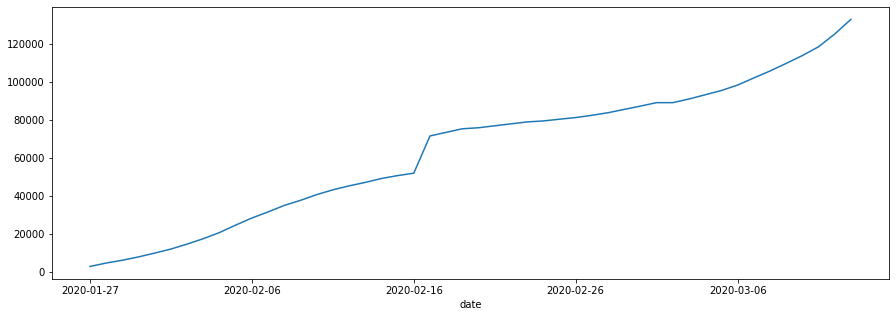

In [5]:
data.global_cases.plot(figsize=(15, 5))

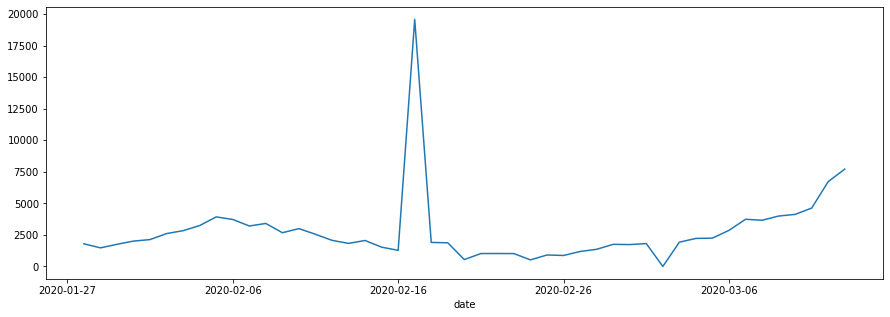

In [6]:
(data.global_cases - data.global_cases.shift(1)).plot(figsize=(15, 5))

In [7]:
from pyramid.arima import auto_arima

In [8]:
stepwise_model = auto_arima(data.global_cases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=886.002, BIC=889.703, Fit time=0.013 seconds
Fit ARIMA: order=(1, 1, 0); AIC=887.405, BIC=892.955, Fit time=0.334 seconds
Fit ARIMA: order=(0, 1, 1); AIC=887.483, BIC=893.033, Fit time=0.118 seconds
Fit ARIMA: order=(1, 1, 1); AIC=889.218, BIC=896.619, Fit time=0.615 seconds
Total fit time: 1.711 seconds


In [9]:
stepwise_model.aic()

886.0023029570843

In [10]:
stepwise_model.fit(data.global_cases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [11]:
predicted_days = 15
firstPredictionDay = datetime.datetime(2020,3,14)

In [12]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [13]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-03-14 - 135523
2020-03-15 - 138288
2020-03-16 - 141053
2020-03-17 - 143818
2020-03-18 - 146583
2020-03-19 - 149348
2020-03-20 - 152113
2020-03-21 - 154878
2020-03-22 - 157643
2020-03-23 - 160409
2020-03-24 - 163174
2020-03-25 - 165939
2020-03-26 - 168704
2020-03-27 - 171469
2020-03-28 - 174234
